In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 1. Last dataene inn i en dataframe og legg til riktige kolonnenavn
Target skal også legges i en egen kolonne i samme dataframe

In [5]:
df = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])

In [6]:
df["Target"] = iris["target"]

In [7]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df["TargetNames"]= df["Target"].map({0:iris["target_names"][0],1:iris["target_names"][1],2:iris["target_names"][2]})

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,TargetNames
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 2. Splitt dataene i trening/utvikling og test:

In [10]:
df.iloc[:,:4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
df["Target"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int32

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:4],df["Target"],random_state=42)

## 4. Tren modellen

In [13]:
logreg = LogisticRegression(solver='lbfgs',max_iter=10)
logreg.fit(X_train, y_train)
print("Nøyaktighet = {:.2f}".format(logreg.score(X_test,y_test)))

Nøyaktighet = 0.71


C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
y_test_hat=logreg.predict(X_test)

## 5. Print / plot relevant metrics/plots

In [15]:
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,recall_score,precision_score, classification_report, roc_curve, roc_auc_score

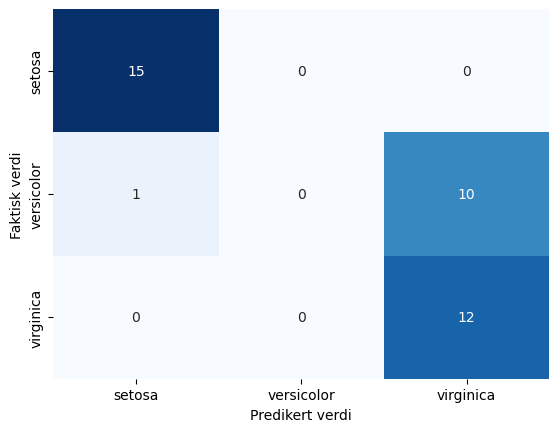

In [16]:
sns.heatmap(confusion_matrix(y_test,y_test_hat), annot=True, cbar=False,cmap="Blues")
plt.ylabel("Faktisk verdi")
plt.xlabel("Predikert verdi")
plt.xticks([0.5,1.5,2.5],iris["target_names"])
plt.yticks([0.5,1.5,2.5],iris["target_names"])
plt.show()

In [17]:
y_test_hat=logreg.predict_proba(X_test)

In [18]:
y_test_cat = pd.get_dummies(y_test)

In [19]:
def plot_roc_curve(y_test,y_test_hat, name):
    fpr, tpr, _ = roc_curve(y_test,y_test_hat)
    plt.plot(fpr,tpr, label=name)

    plt.xlabel("FPR / 1 - Spesifisitet ")
    plt.ylabel("TPR / Sensitivitet ")
 

1.0
0.9797979797979798
1.0


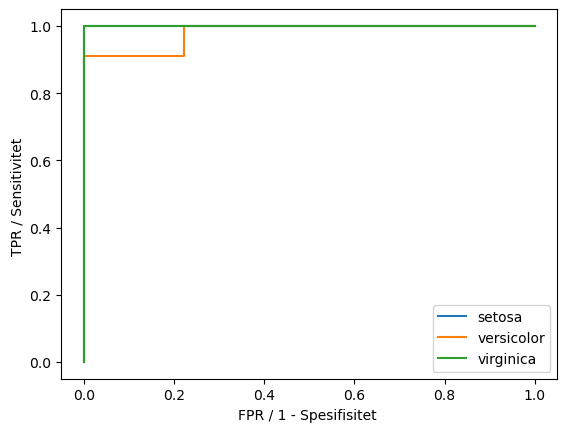

In [23]:
for n in range(3):
    X_test_class_n = X_test
    y_test_class_n_hat = logreg.predict_proba(X_test_class_n)
    
    roc_score = roc_auc_score(y_test_cat.iloc[:,n],y_test_class_n_hat[:,n])
    plot_roc_curve(y_test_cat.iloc[:,n],y_test_class_n_hat[:,n], name=iris["target_names"][n])
    print(roc_score)
    #print(accuracy_score(y_test_cat.iloc[:,n],(y_test_class_n_hat[:,n]>0.5)*1))
plt.legend()
plt.show()